In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


opinions = pd.read_csv("all_opinions.csv")

In [17]:
rbg_scalia= opinions[(opinions["author_name"] == "Justice Ginsburg") |
                  (opinions["author_name"] == "Justice Scalia")].reset_index(drop = True)

In [46]:
rbg_scalia.head()

,author_name,category,per_curiam,case_name,date_filed,federal_cite_one,absolute_url,cluster,year_filed,scdb_id,scdb_decision_direction,scdb_votes_majority,scdb_votes_minority,text,num_words,author
0,Justice Ginsburg,dissenting,False,"Masterpiece Cakeshop, Ltd. v. Colorado Civil R...",2018-06-13,NaN,https://www.courtlistener.com/opinion/4507882/...,https://www.courtlistener.com/api/rest/v3/clus...,2018,NaN,NaN,NaN,NaN,There is much in the Court’s opinion with whic...,2527,True
1,Justice Scalia,majority,False,"Oncale v. Sundowner Offshore Services, Inc.",1998-03-04,NaN,https://www.courtlistener.com/opinion/118181/o...,https://www.courtlistener.com/api/rest/v3/clus...,1998,1997-037,2.0,9.0,0.0,This case presents the question whether workpl...,1854,False
2,Justice Scalia,majority,False,Summers v. Earth Island Institute,2009-03-03,NaN,https://www.courtlistener.com/opinion/145904/s...,https://www.courtlistener.com/api/rest/v3/clus...,2009,2008-027,1.0,5.0,4.0,Respondents are a group of organizations dedic...,3634,False
3,Justice Scalia,majority,False,Budinich v. Becton Dickinson & Co.,1988-05-23,NaN,https://www.courtlistener.com/opinion/112076/b...,https://www.courtlistener.com/api/rest/v3/clus...,1988,1987-088,2.0,9.0,0.0,Petitioner brought this action in Colorado sta...,2134,False
4,Justice Scalia,majority,False,Reiter v. Cooper,1993-03-08,NaN,https://www.courtlistener.com/opinion/112830/r...,https://www.courtlistener.com/api/rest/v3/clus...,1993,1992-041,2.0,8.0,1.0,"This case presents the question whether, when ...",3230,False


# Exploration of word dists, class dist, and opinions

https://www.supremecourt.gov/opinions/opinions.aspx


Scalia tenure was: September 26, 1986 – February 13, 2016 (30yrs)
RBG tenure was: 1993 to 2020 (27 years)

In [18]:
rbg_scalia["num_words"] = rbg_scalia.text.apply(lambda x: len(x.split()))

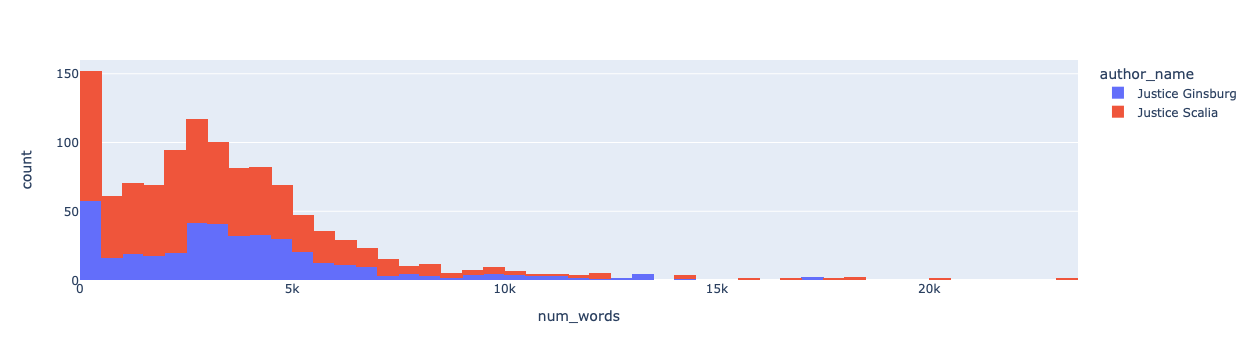

In [19]:
px.histogram(rbg_scalia, "num_words", color = "author_name")

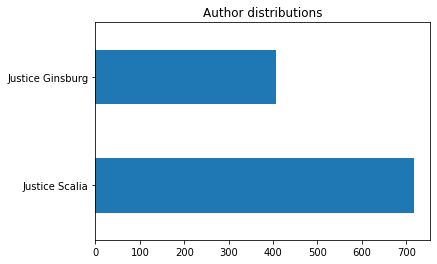

In [21]:
rbg_scalia["author"] = rbg_scalia.author_name.apply(lambda x: x == "Justice Ginsburg")
rbg_scalia.author_name.value_counts().plot.barh()
plt.title("Author distributions")
plt.show()
#RBG wrote half as many opinions as scalia, which translates to a 

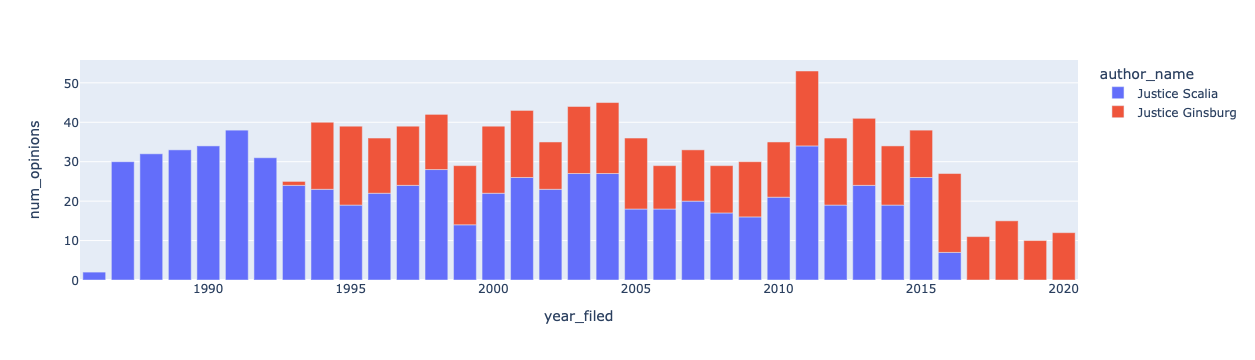

In [45]:
#opinions over time
#we want three columns. Year published, author name, and number of opinions
opinions_over_time = rbg_scalia.groupby(["year_filed", "author_name"], as_index = False).agg(num_opinions = ("author_name", "count"))
px.bar(opinions_over_time, x = "year_filed", y = "num_opinions", color = "author_name")

# Text preprocessing

* remove any references to each other or other justices
* remove any hyperlinks
* remove any newlines
* remove Cite As issues
* remove numbers, page numbers, roman numerals
* remove dates


Try to do this first by "re" methods, then try to use hugging face transformers to clean stuff up




In [50]:
import random
print(rbg_scalia.text[100])

We consider the circumstances under which an em
ployer may be held liable for employment discrimination
based on the discriminatory animus of an employee who
influenced, but did not make, the ultimate employment
decision.
                                         I
  Petitioner Vincent Staub worked as an angiography
technician for respondent Proctor Hospital until 2004,
when he was fired. Staub and Proctor hotly dispute the
facts surrounding the firing, but because a jury found for
Staub in his claim of employment discrimination against
Proctor, we describe the facts viewed in the light most
favorable to him.
  While employed by Proctor, Staub was a member of the
United States Army Reserve, which required him to at
tend drill one weekend per month and to train full time for
two to three weeks a year. Both Janice Mulally, Staub’s
immediate supervisor, and Michael Korenchuk, Mulally’s
supervisor, were hostile to Staub’s military obligations.
Mulally scheduled Staub for additional shifts w

In [52]:
rbg_scalia.head()

,author_name,category,per_curiam,case_name,date_filed,federal_cite_one,absolute_url,cluster,year_filed,scdb_id,scdb_decision_direction,scdb_votes_majority,scdb_votes_minority,text,num_words,author
0,Justice Ginsburg,dissenting,False,"Masterpiece Cakeshop, Ltd. v. Colorado Civil R...",2018-06-13,NaN,https://www.courtlistener.com/opinion/4507882/...,https://www.courtlistener.com/api/rest/v3/clus...,2018,NaN,NaN,NaN,NaN,There is much in the Court’s opinion with whic...,2527,True
1,Justice Scalia,majority,False,"Oncale v. Sundowner Offshore Services, Inc.",1998-03-04,NaN,https://www.courtlistener.com/opinion/118181/o...,https://www.courtlistener.com/api/rest/v3/clus...,1998,1997-037,2.0,9.0,0.0,This case presents the question whether workpl...,1854,False
2,Justice Scalia,majority,False,Summers v. Earth Island Institute,2009-03-03,NaN,https://www.courtlistener.com/opinion/145904/s...,https://www.courtlistener.com/api/rest/v3/clus...,2009,2008-027,1.0,5.0,4.0,Respondents are a group of organizations dedic...,3634,False
3,Justice Scalia,majority,False,Budinich v. Becton Dickinson & Co.,1988-05-23,NaN,https://www.courtlistener.com/opinion/112076/b...,https://www.courtlistener.com/api/rest/v3/clus...,1988,1987-088,2.0,9.0,0.0,Petitioner brought this action in Colorado sta...,2134,False
4,Justice Scalia,majority,False,Reiter v. Cooper,1993-03-08,NaN,https://www.courtlistener.com/opinion/112830/r...,https://www.courtlistener.com/api/rest/v3/clus...,1993,1992-041,2.0,8.0,1.0,"This case presents the question whether, when ...",3230,False
